In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/B1/synthetic_fraud_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.drop(columns=['velocity_last_hour','weekend_transaction','transaction_hour','device_fingerprint','city_size','transaction_id','merchant','ip_address','card_number'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   timestamp           object 
 2   merchant_category   object 
 3   merchant_type       object 
 4   amount              float64
 5   currency            object 
 6   country             object 
 7   city                object 
 8   card_type           object 
 9   card_present        bool   
 10  device              object 
 11  channel             object 
 12  distance_from_home  int64  
 13  high_risk_merchant  bool   
 14  is_fraud            bool   
dtypes: bool(3), float64(1), int64(1), object(10)
memory usage: 706.6+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['card_present'] = le.fit_transform(df['card_present'])
df['is_fraud'] = le.fit_transform(df['is_fraud'])
df['high_risk_merchant'] = le.fit_transform(df['high_risk_merchant'])

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

In [10]:
corr_matrix = numeric_cols.corr()

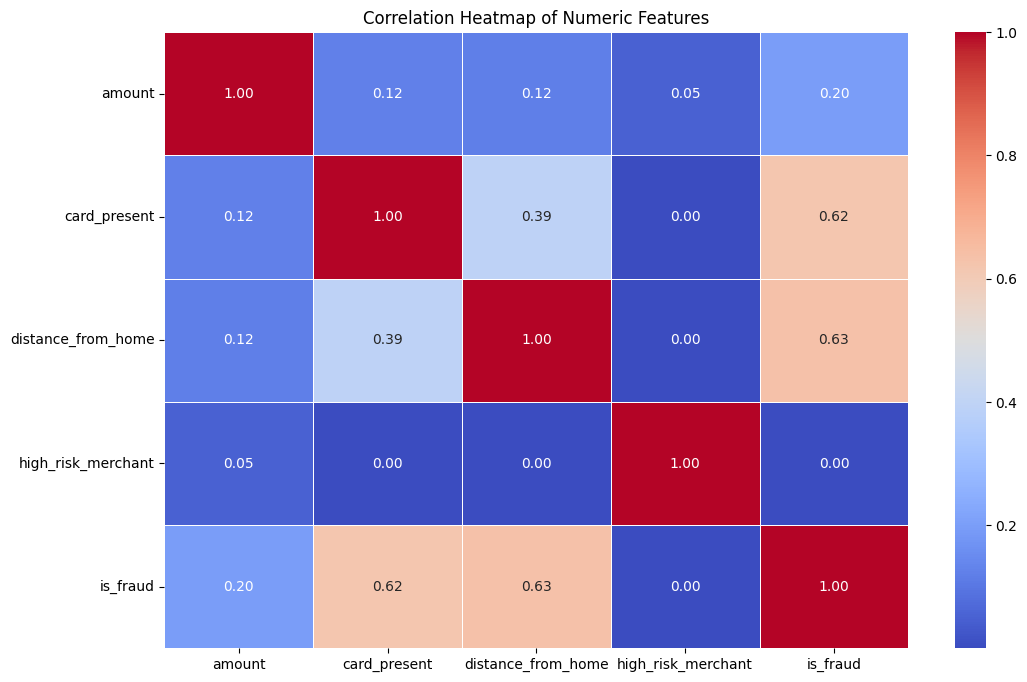

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [12]:
df.isnull().sum()
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')

In [13]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['date'] = df['timestamp'].dt.date

<Axes: xlabel='is_fraud', ylabel='count'>

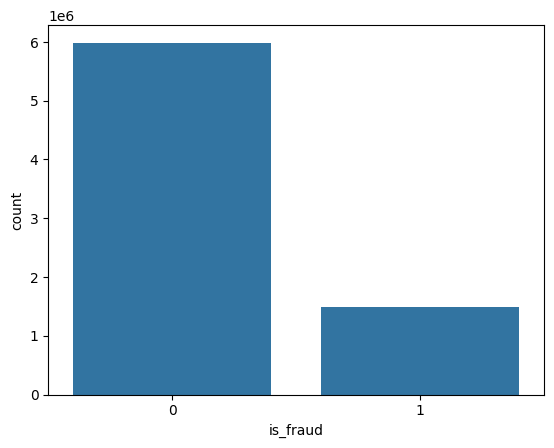

In [14]:
#CLass Imbalance Check
sns.countplot(x='is_fraud', data=df)

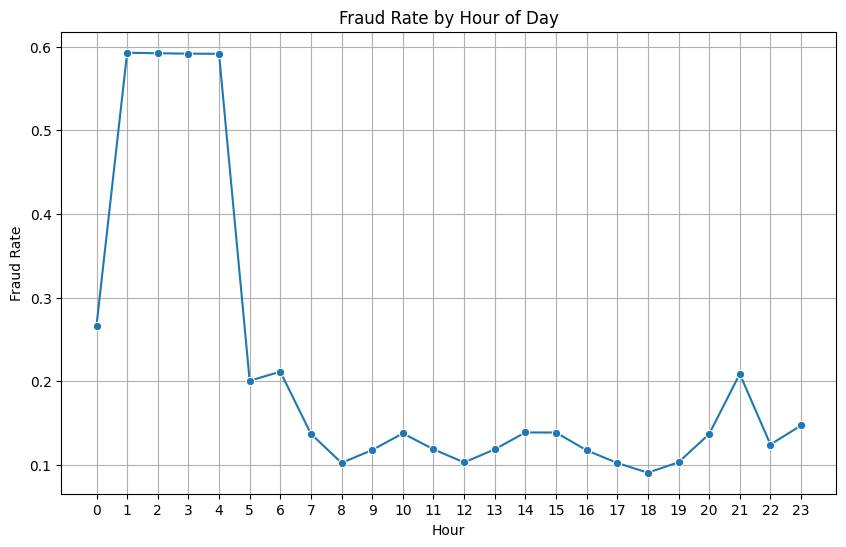

In [15]:
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [16]:
df['amount'] = pd.to_numeric(df['amount'], downcast='float')
df['distance_from_home'] = pd.to_numeric(df['distance_from_home'], downcast='integer')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 19 columns):
 #   Column              Dtype              
---  ------              -----              
 0   customer_id         object             
 1   timestamp           datetime64[ns, UTC]
 2   merchant_category   object             
 3   merchant_type       object             
 4   amount              float64            
 5   currency            object             
 6   country             object             
 7   city                object             
 8   card_type           object             
 9   card_present        int64              
 10  device              object             
 11  channel             object             
 12  distance_from_home  int8               
 13  high_risk_merchant  int64              
 14  is_fraud            int64              
 15  hour                int32              
 16  dayofweek           int32              
 17  month               int32  

In [18]:
def remove_outliers(df, columns=None, lower_q=0.01, upper_q=0.99):
    """
    Removes outliers based on quantile thresholds across specified numeric columns.

    Parameters:
    - df: DataFrame
    - columns: list of column names to apply outlier filtering
               If None, applies to all float/int columns
    - lower_q: lower quantile cutoff
    - upper_q: upper quantile cutoff

    Returns:
    - DataFrame with outliers removed
    """
    import numpy as np

    if columns is None:
        columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

    for col in columns:
        lower_bound = df[col].quantile(lower_q)
        upper_bound = df[col].quantile(upper_q)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [19]:
# Define numeric columns you care about
numeric_cols = ['amount', 'distance_from_home', 'card_present', 'high_risk_merchant',
                'hour', 'dayofweek', 'month']

# Apply outlier removal
df_clean = remove_outliers(df, numeric_cols)
print(f"New shape after outlier removal: {df_clean.shape}")

New shape after outlier removal: (7334188, 19)


In [20]:
df_clean.to_csv('/content/drive/MyDrive/B1/df_clean.csv', index=False)